# Image restoration with inverse filtering

Lab 5, SDP

## 1 Objective

Using inverse FIR filters in an image processing application.

## 2 Theoretical notions

The inverse filter $H_I(z)$ of any filter $H(z)$ is the system that
cancels the effect of $H(z)$ on a signal:

$$H_I \lbrace  H \lbrace x[n] \rbrace \rbrace \approx x[n]$$

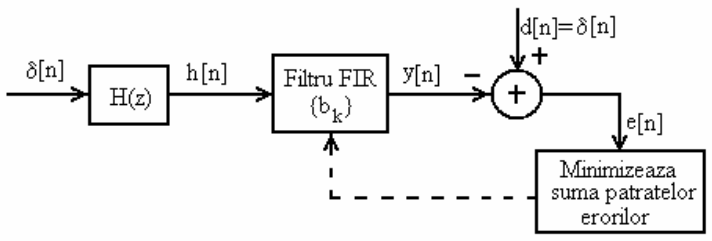

## 3 Practical application

We illustrate the use of the inverse filter through the following
practical application.

### Defining distortions

Let the four functions below define a series of distortions on an input
signal/image:

`distort()`, `distort_more()`, `distort_noisy()`, `distort_delay()`

#### Requirement 1

Copy the functions below into Matlab files so that they can be used
later.

``` matlab
function y = distort(x)
    L1 = 5;
    coef = [zeros(1,L1) 1.1.^[0:-1:-L1]];
    coef = coef / norm(coef,1);
    coef  = fliplr(coef);  % filter2 expects kernel, not impulse response, it doesn't flip it
    coef;
    y = filter2(coef, x, 'same');
end
```

``` matlab
function y = distort_more(x)
    L1 = 10;
    coef = [zeros(1,L1) 1.1.^[0:-1:-L1]];
    coef = coef / norm(coef,1);
    coef  = fliplr(coef);  % filter2 expects kernel, not impulse response, it doesn't flip it
    coef;
    y = filter2(coef, x, 'same');
end
```

``` matlab
function y = distort_noisy(x)
    L1 = 5;
    coef = [zeros(1,L1) 1.1.^[0:-1:-L1]];
    coef = coef / norm(coef,1);
    coef  = fliplr(coef);  % filter2 expects kernel, not impulse response, it doesn't flip it
    coef;
    y = filter2(coef, x, 'same');
    
    y = y + 0.05*randn(size(y));
end
```

``` matlab
function y = distort_delay(x)
    Delay = 10;
    L1 = 5;
    coef = [zeros(1,L1+Delay) 1.1.^[0:-1:-L1]];
    coef = coef / norm(coef,1);
    coef  = fliplr(coef);  % filter2 expects kernel, not impulse response, it doesn't flip it
    coef;
    y = filter2(coef, x, 'same');
end
```

### Distorting an image

#### Requirement 2

Load the image `lena512.bmp`, convert it to type double, convert it to
grayscale, and display it.

Use the following Matlab functions:

-   `imread()`
-   `double()`, followed by division by 255
-   `im2gray()`
-   `imshow()`

``` matlab
I1 = ...   % original image
I2 = ...   % after preprocessing
...
```

#### Requirement 3

Distort the image by calling the distortion function `distort()` on the
image, and display the result.

What does the distorted image look like? What type of distortion is
this?

``` matlab
I3 = ...
imshow(I3)
```

### Restoring the image using inverse filtering

Steps:

1.  Obtain the impulse response by calling the function on a unit
    impulse signal

2.  Calculate the inverse FIR filter using the function from the
    previous lab

3.  Filter each line of the distorted image with the inverse filter (1-D
    filtering) and store the results in a new image.

    For filtering, use one of the following two functions:

    -   function `filter2(h, I3)`
    -   function `filter(h, 1, I3(i,:))` on each line `i` of the image

4.  Display the result

#### Requirement 4

Find and display the impulse response of the distortion `distort()`

``` matlab
h = ...
```

#### Requirement 5

Calculate the inverse filter with the function `InverseFIR()` from
previous lab, display the coefficients and the impulse response.

What is $H(z) =$?

``` matlab
b = 

% Make b horizontal
b = b'

stem(b)
```

#### Requirement 6

Filter each line of the distorted image with the found filter, store the
results, and display the final image.

``` matlab
...

imshow(Irec)
```

### Final requirements

1.  Repeat with other images (`bugs.jpg`, `barbara.png`)
2.  Repeat with the other `distort_*()` functions. When are the results
    worse?